<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## Open Machine Learning Course
<center>Author: [Yury Kashnitsky](https://www.linkedin.com/in/festline/), Data Scientist at Mail.ru Group <br>
Translated by [Anna Larionova](https://www.linkedin.com/in/anna-larionova-74434689/), DS @ Picturer, Data4, BNTouch <br> All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.
You may use this material for any purpose (you can edit, correct and use it as example) exept commercial use with mandatory citation of author.

# <center> Assignment #4 (demo)
## <center> Linear Regression as an optimization problem
    
(no solution shared, part of [this](https://ru.coursera.org/specializations/machine-learning-data-analysis) Coursera specialization)

### Part 1. Basic data analysis with Pandas

In this task we will use [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) data containing information about height and weight of 25 thousands teenagers.

**[1]. If you haven't installed yet Seaborn library you should execute *conda install seaborn* in the terminal. (Seaborn isn't part of Anaconda and it provides suitable high level functionality for data visualization).**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the data about height and weight into Pandas DataFrame:

data = pd.read_csv('../input/weights_heights.csv', index_col='Index')

import math
import datetime
import sys
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def loadDataSet(file_name, label_existed_flag):
    feats = []
    labels = []
    fr = open(file_name)
    lines = fr.readlines()
    for line in lines:
        temp = []
        allInfo = line.strip().split(',')
        dims = len(allInfo)
        if label_existed_flag == 1:
            for index in range(dims-1):
                temp.append(float(allInfo[index]))
            feats.append(temp)
            labels.append(float(allInfo[dims-1]))
        else:
            for index in range(dims):
                temp.append(float(allInfo[index]))
            feats.append(temp)
    fr.close()
    feats = np.array(feats)
    labels = np.array(labels)
    return feats, labels

In [6]:
train_file =  "../data/train_data.txt"
test_file = "../data/test_data.txt"
predict_file = "../projects/student/result.txt"

In [7]:
%%time
X_train, y_train = loadDataSet(train_file, 1)

CPU times: user 3.3 s, sys: 198 ms, total: 3.5 s
Wall time: 3.5 s


In [8]:
%%time
X_test, _ = loadDataSet(test_file, 0)
answer_file = "../projects/student/answer.txt"
_, y_test = loadDataSet(answer_file, 1)

CPU times: user 847 ms, sys: 23.5 ms, total: 871 ms
Wall time: 870 ms


First thing you should do after reading the data is to look at first records. It helps to find the data reading errors (for example, when we have 1 column instead of 10 and it has 9 dots with commas in column name). Also it allows to take a closer look at the data and features and their nature (numerical, categorical, etc.).

Than we should plot histograms of feature distributions. Also it can help to understand features nature (power-series distribution or standard or something else). Histogram can help us find some values that aren't similar to each other - outliers.
It is convenient to plot histograms using *plot* method of Pandas DataFrame with option *kind='hist'*.

**Example.** Let's plot the histogram of teenager's height distribution. We use method *plot* for DataFrame *data* with options *y='Height'* (the feature which distribution we want to plot).

In [12]:
data = pd.DataFrame(X_train)

In [16]:
data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.239,0.079,0.934,0.131,0.024,0.748,0.951,0.922,0.858,0.475,...,0.202,0.747,0.097,0.141,0.314,0.268,0.851,0.746,0.554,0.951
1,0.972,0.852,0.330,0.114,0.003,0.383,0.192,0.180,0.860,0.654,...,0.571,0.333,0.052,0.201,0.495,0.631,0.017,0.925,0.047,0.327
2,0.118,0.368,0.989,0.331,0.944,0.539,0.118,0.867,0.351,0.956,...,0.119,0.122,0.170,0.270,0.917,0.503,0.068,0.160,0.751,0.784
3,0.044,0.476,0.882,0.202,0.445,0.290,0.162,0.620,0.428,0.610,...,0.606,0.178,-0.265,0.686,0.876,0.287,0.504,0.863,0.997,0.541
4,0.199,0.242,0.322,0.081,0.695,0.206,0.052,0.732,0.268,0.820,...,0.985,0.661,0.084,0.006,0.145,0.846,0.344,0.346,0.506,0.624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.280,0.598,0.681,0.806,0.222,0.714,0.061,0.491,0.913,0.218,...,0.571,0.867,0.003,0.242,0.763,0.046,0.135,0.257,0.655,0.807
7996,0.815,0.605,0.835,0.824,0.874,0.364,0.540,0.677,0.858,0.660,...,0.501,0.107,0.499,0.433,0.584,0.326,0.881,0.207,0.107,0.141
7997,0.302,0.206,0.259,0.904,0.053,0.448,0.131,0.696,0.448,0.850,...,0.282,0.538,0.820,0.894,0.488,0.145,0.489,0.555,0.211,0.919
7998,0.898,0.165,0.165,0.157,0.199,0.874,0.802,0.682,0.084,0.171,...,0.468,0.646,0.603,0.878,0.139,0.725,0.459,0.342,0.954,0.231


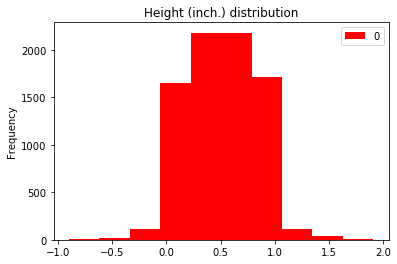

In [17]:
data.plot(y=0, kind='hist', 
           color='red',  title='Height (inch.) distribution');

Options:

- *y='Height'* - the feature which distribution we want to plot
- *kind='hist'* - means that plot type is histogram
- *color='red'* - set color

**[2]. Look at the first 5 rows using *head* method of Pandas DataFrame. Plot the histogram of weight distribution using method *plot* Pandas DataFrame. Make the color of histogram to be green and add title.**

In [18]:
# Your code here
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.239,0.079,0.934,0.131,0.024,0.748,0.951,0.922,0.858,0.475,...,0.202,0.747,0.097,0.141,0.314,0.268,0.851,0.746,0.554,0.951
1,0.972,0.852,0.330,0.114,0.003,0.383,0.192,0.180,0.860,0.654,...,0.571,0.333,0.052,0.201,0.495,0.631,0.017,0.925,0.047,0.327
2,0.118,0.368,0.989,0.331,0.944,0.539,0.118,0.867,0.351,0.956,...,0.119,0.122,0.170,0.270,0.917,0.503,0.068,0.160,0.751,0.784
3,0.044,0.476,0.882,0.202,0.445,0.290,0.162,0.620,0.428,0.610,...,0.606,0.178,-0.265,0.686,0.876,0.287,0.504,0.863,0.997,0.541
4,0.199,0.242,0.322,0.081,0.695,0.206,0.052,0.732,0.268,0.820,...,0.985,0.661,0.084,0.006,0.145,0.846,0.344,0.346,0.506,0.624


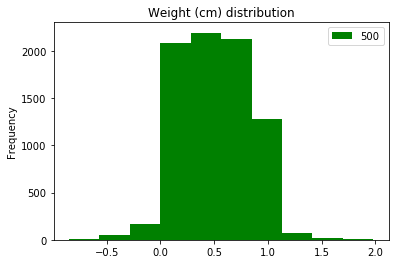

In [19]:
# Your code here
data.plot(y=500,color='green',kind='hist', title='Weight (cm) distribution')

One of the most effective methods of basic data analysis is mapping pairwise dependencies of features. We make $m \times m$ plots (*m* is number of features) where we have histograms of feature distributions in diagonal and scatter plots of two feature dependencies outside. We can do this using $scatter\_matrix$ method of Pandas Data Frame or *pairplot* of Seaborn library. 

To illustrate this method we add third feature. Let's create *bodymass index* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). To do this we use *apply* method of Pandas FataFrame and Python's lambda functions.

In [20]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [22]:
data['BMI'] = data.apply(lambda row: make_bmi(row[0], 
                                              row[1]), axis=1)

/root/miniconda3/envs/kunpeng/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


**[3]. Create the picture that contains pairwise dependencies of features 'Height', 'Weight' и 'BMI'. You should use *pairplot* method of Seaborn library.**

In [35]:
data[[0,1,2,3,4,5]]

,0,1,2,3,4,5
0,0.239,0.079,0.934,0.131,0.024,0.748
1,0.972,0.852,0.330,0.114,0.003,0.383
2,0.118,0.368,0.989,0.331,0.944,0.539
3,0.044,0.476,0.882,0.202,0.445,0.290
4,0.199,0.242,0.322,0.081,0.695,0.206
...,...,...,...,...,...,...
7995,0.280,0.598,0.681,0.806,0.222,0.714
7996,0.815,0.605,0.835,0.824,0.874,0.364
7997,0.302,0.206,0.259,0.904,0.053,0.448
7998,0.898,0.165,0.165,0.157,0.199,0.874


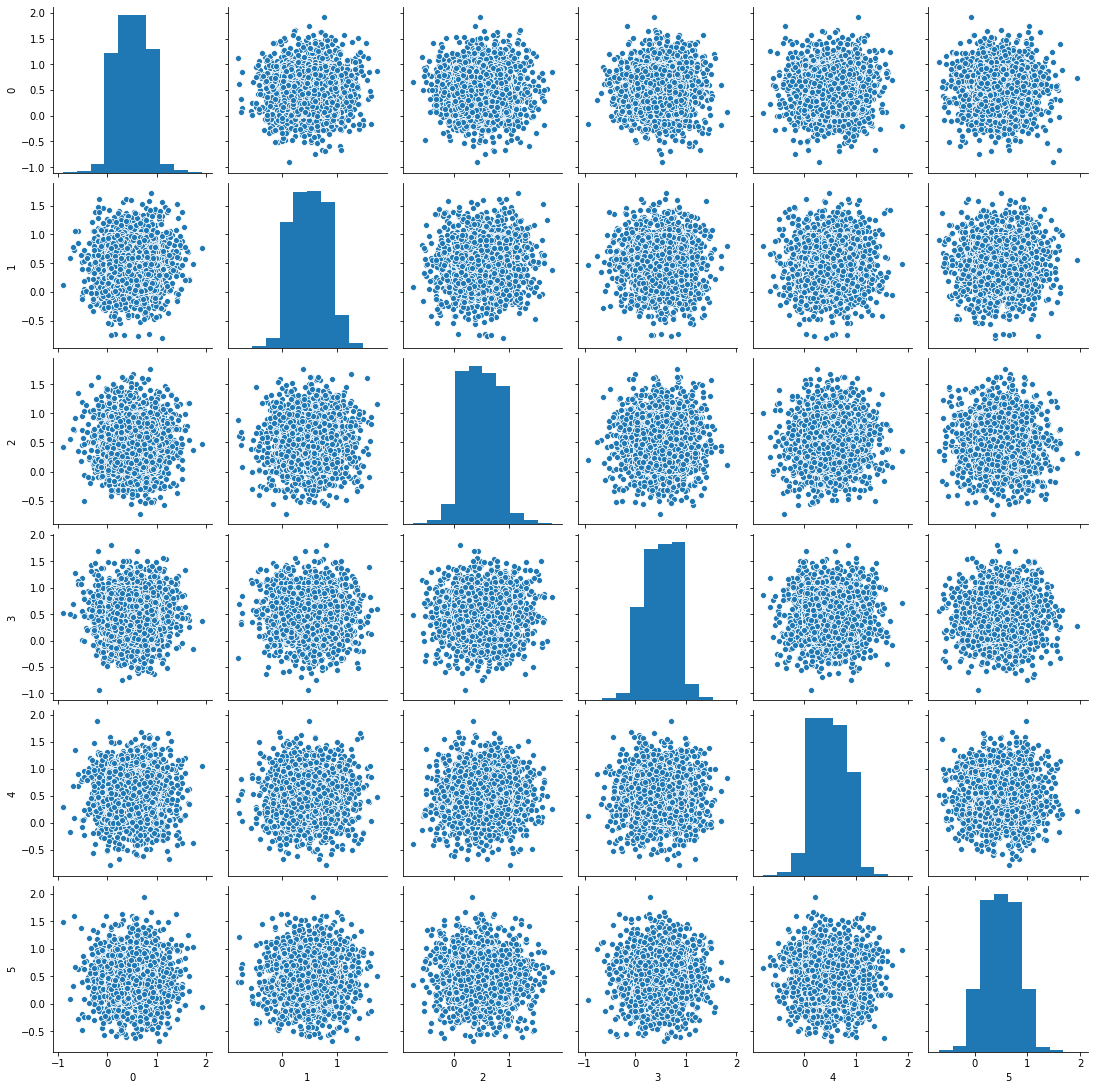

In [36]:
# Your code here
sns.pairplot(data[[0,1,2,3,4,5]])

During the basic analysis you often have to investigate dependencies of numerical from categorical features (for example, dependency between salary and employee sex). In this case we can use boxplots from Seaborn library. Box plot is a compact way to show real value statistics (mean and quartiles) by different values of categorical feature. It also helps to find outliers - observations that have very different values from others.

**[4]. Create new feature *weight_category* in DataFrame *data* that will have 3 values: 1 if the weight is less than 120 pounds, 3 if the weight is greater or equal to 150 pounds, 2 in other cases. Create boxplot showing dependency between height and weight category. Use *boxplot* method of Seaborn library and *apply* method of Pandas DataFrame. Add titles "Height" to *y* axis and "Weight category" to *x* axis.**

def weight_category(weight):
    if weight <= 120:
        return 1
    if weight >= 150:
        return 3
    else:
        return 2
    # Your code here

data['weight_cat'] = data['Weight'].apply(weight_category)

sns.boxplot(data=data,x='weight_cat',y='Height')
# Your code here

**[5]. Create scatter plot of dependencies between height and weight using *plot* method for Pandas DataFrame with option *kind='scatter'*. Add title to the figure.**

# Your code here
data.plot(kind='scatter',x='Height',y='Weight')

## Part 2. Squared Error Minimization

In basic case the task of real value prediction by other features (regression task) can be solved using squared error minimization.

**[6]. Create function computing squared error of dependency approximation between height $y$ and weight $x$ using straight line $y = w_0 + w_1 * x$ by two parameters $w_0$ and $w_1$:**
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Where $n$ is number of observations in dataset, $y_i$ and $x_i$ are height and weight of $i$th person in dataset. 

In [37]:
# Your code here
def SEM(x,y,w0,w1):
    sem = 0
    for i in range(1,len(x)):
        sem = sem + (y[i]-(w0 + w1 * x[i]))**2    
    return sem  

So we are solving the task how to draw a straight line through the points cloud corresponding to observations in our dataset in space of features "Height" and "Weight" to minimize function[6]. Let's start with drawings some lines and make sure they transfer dependencies from height to weight.

**[7]. On plot from [5] Problem 1 draw two straight lines corresponding to values of parameters $w_0, w_1) = (60, 0.05)$ and ($w_0, w_1) = (50, 0.16)$. Use *plot* method from *matplotlib.pyplot* and *linspace* method from NumPy library. Add the titles to axes and plot.**

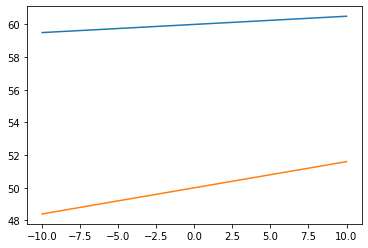

In [38]:
# Your code here
x = np.linspace(-10,10,20)
y_1 = 60 + 0.05 * x
y_2 = 50 + 0.16 * x
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.show()

Squared error function minimization is very easy task because of the function's convex nature. There are many optimization methods for this problem. Let's look at dependency between error function and the first parameter (slope of the straight line) if the second parameter (absolute term) is fixed.

**[8]. Plot dependency between error function calculated in [6] and $w_1$ parameter when $w_0$ = 50. Add the titles to axes and plot.**

In [40]:
# Your code here
w_0=50
w_1=np.linspace(-10,10,20)
sem = [SEM(data[[0], data[[1],w0=w_0, w1=i) for i in w_1]
plt.scatter(x=w_1, y=sem)
plt.title('SEM vs. w1')
plt.xlabel('w1')
plt.ylabel('SEM')
plt.show()

SyntaxError: invalid syntax (<ipython-input-40-21e2a7f34ee5>, line 4)

Now we can find the slope of the straight line approximating dependency between height and weight when coefficient is fixed $w_0 = 50$ using optimization method.

**[9]. Using *minimize_scalar* method from *scipy.optimize* find the minimum of the function[6] for parameter value $w_1$ in range [-5,5]. Draw on plot [5] Problem 1 the straight line corresponding to the values of parameters ($w_0$, $w_1$) = (50, $w_1\_opt$) where $w_1\_opt$ is optimal value of parameter $w_1$ that was found in [8].**

In [14]:
# Your code here
from scipy.optimize import minimize_scalar
def SEM1(x):
    sem = SEM(x=data.Height, y=data.Weight, w0=50, w1=x)
    return sem
w1_opt=minimize_scalar(SEM1)
w1_opt=w1_opt.x

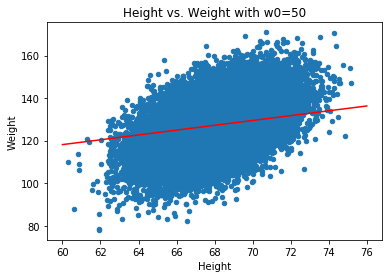

In [15]:
# Your code here
data.plot(kind='scatter',x='Height', y='Weight')
xx=np.linspace(60,76,10)
yy=50+xx*w1_opt
plt.plot(xx,yy, color='red')
plt.title('Height vs. Weight with w0=50')
plt.show()

When you analyze multidimensional data, you often want to get intuitive understanding about data nature using visualization. It is impossible to plot the data when you have more than 3 features. It is better to choose 2 or 3 principal components from data and represent them in plane or volume.

Let's have a look how Python can draw 3D figures on example of function $z(x,y) = sin(\sqrt{x^2+y^2})$ for values of $x$ и $y$ from interval [-5,5] with step 0.25

In [16]:
from mpl_toolkits.mplot3d import Axes3D

Create objects of type matplotlib.figure.Figure (picture) and  matplotlib.axes._subplots.Axes3DSubplot (axes). 

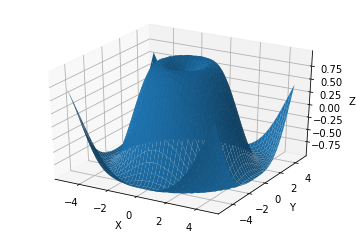

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Create NumPy arrays with data points on X and Y axes.
# Use meshgrid method creating matrix of coordinates
# By vectors of coordinates. Set needed function Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Finally use *plot_surface* method of type object
# Axes3DSubplot. Add titles to axes.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10]. Create 3D-plot between error function calculated in [6] and parameters $w_0$ and $w_1$. Add titles "Intercept" to the $x$ axis, "Slope" to the $y$ axis, "Error" to the $z$ axis.**

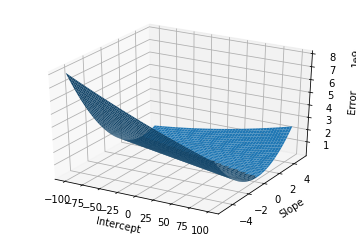

In [18]:
# Your code here
xx=np.arange(-100,100,1)
yy=np.arange(-5,5,0.05)
xx, yy = np.meshgrid(xx, yy)
zz=SEM(x=data.Height, y=data.Weight, w0=xx, w1=yy)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, zz)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

**[11]. Find the minimum of the function in [6] using *minimize* method from scipy.optimize for parameters values $w_0$ in range [-100,100] and $w_1$ in range [-5, 5]. Starting point is ($w_0$, $w_1$) = (0, 0). Use L-BFGS-B optimization method (option method in minimize). Draw on plot from [5] Problem 1 the straight line coresponding finded optimal values of parameters $w_0$ and $w_1$. Add titles to the axes and plot.**

In [19]:
# Your code here
from scipy.optimize import minimize
def SEM2(x):
    sem = SEM(x=data.Height, y=data.Weight, w0=x[0], w1=x[1])
    return sem
bnd=((-100,100),(-5,5))
out=minimize(SEM2, (0,0), method='L-BFGS-B', bounds=bnd)
out=out.x

<Figure size 432x288 with 0 Axes>

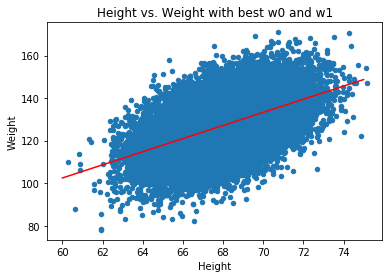

In [20]:
# Your code here
plt.figure()
data.plot(kind='scatter',x='Height',y='Weight')
xx=np.arange(60,76,1)
yy=out[0]+out[1]*xx
plt.plot(xx,yy, color='red')
plt.title('Height vs. Weight with best w0 and w1')
plt.show()